In [1]:
!pip install --upgrade requests beautifulsoup4 pandas scikit-learn matplotlib scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 1.6 MB/s eta 0:00:001.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 5.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 20.4 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.1 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 2.2 MB/s eta 0:00:002.3 MB/s 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 3.0 MB/s eta 0:00:000:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 3.5 MB/s eta 0:00:00


In [2]:
import math
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')
tbl = soup.find("table",{"class":"wikitable"})

In [5]:
tbl

<table border="1" class="wikitable" style="text-align:center; width:30%">
<tr>
<th>Index</th><th>Height(Inches)</th><th>Weight(Pounds)
</th></tr>
<tr>
<td>1</td><td>65.78</td><td>112.99
</td></tr>
<tr>
<td>2</td><td>71.52</td><td>136.49
</td></tr>
<tr>
<td>3</td><td>69.40</td><td>153.03
</td></tr>
<tr>
<td>4</td><td>68.22</td><td>142.34
</td></tr>
<tr>
<td>5</td><td>67.79</td><td>144.30
</td></tr>
<tr>
<td>6</td><td>68.70</td><td>123.30
</td></tr>
<tr>
<td>7</td><td>69.80</td><td>141.49
</td></tr>
<tr>
<td>8</td><td>70.01</td><td>136.46
</td></tr>
<tr>
<td>9</td><td>67.90</td><td>112.37
</td></tr>
<tr>
<td>10</td><td>66.78</td><td>120.67
</td></tr>
<tr>
<td>11</td><td>66.49</td><td>127.45
</td></tr>
<tr>
<td>12</td><td>67.62</td><td>114.14
</td></tr>
<tr>
<td>13</td><td>68.30</td><td>125.61
</td></tr>
<tr>
<td>14</td><td>67.12</td><td>122.46
</td></tr>
<tr>
<td>15</td><td>68.28</td><td>116.09
</td></tr>
<tr>
<td>16</td><td>71.09</td><td>140.00
</td></tr>
<tr>
<td>17</td><td>66.46</td><

In [6]:
height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)','Weight(Pounds)']]

In [7]:
height_weight_df

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


In [8]:
num_records = height_weight_df.shape[0]
print(num_records)

200


In [9]:
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records, 1)

In [10]:
model = linear_model.LinearRegression()
_ = model.fit(x,y)

In [14]:
print("ŷ = " + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " X₁")

ŷ = -106.02770644878132 + 3.432676129271629 X₁


In [15]:
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

7.7587373803882205


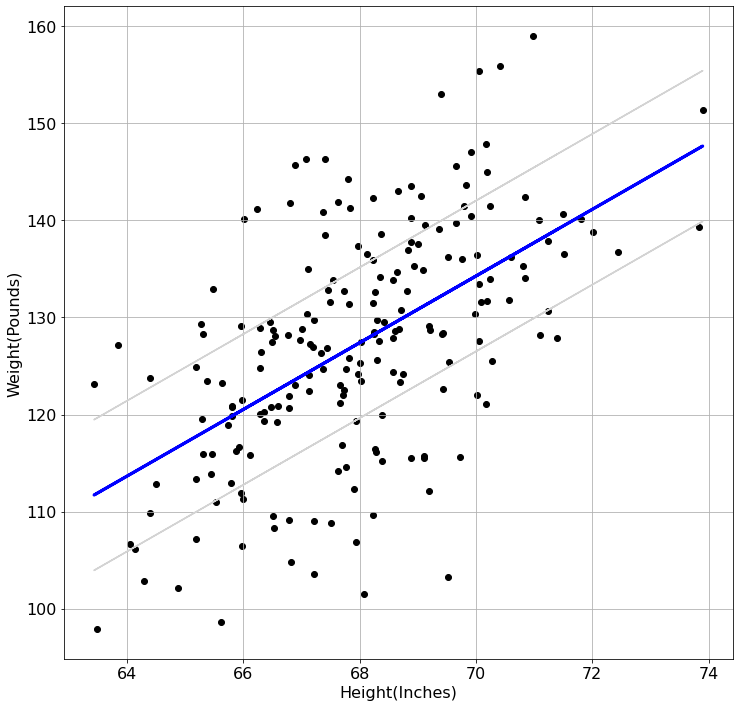

In [16]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 16})
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.title('')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)
plt.show()

In [17]:
corr, pval = pearsonr(x[:,0], y[:,0])
print(corr)

0.5568647346122992


In [18]:
print(pval < 0.05)

True
